#1.Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembr (numa célula só ou em várias).<a name="import"></a>



2019-01-01 2019-03-31
2019-03
2019-01-01 2019-04-30
2019-04
2019-01-01 2019-06-30
2019-06
2019-01-01 2019-07-31
2019-07


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


2019-01-01 2019-12-31
2019-12


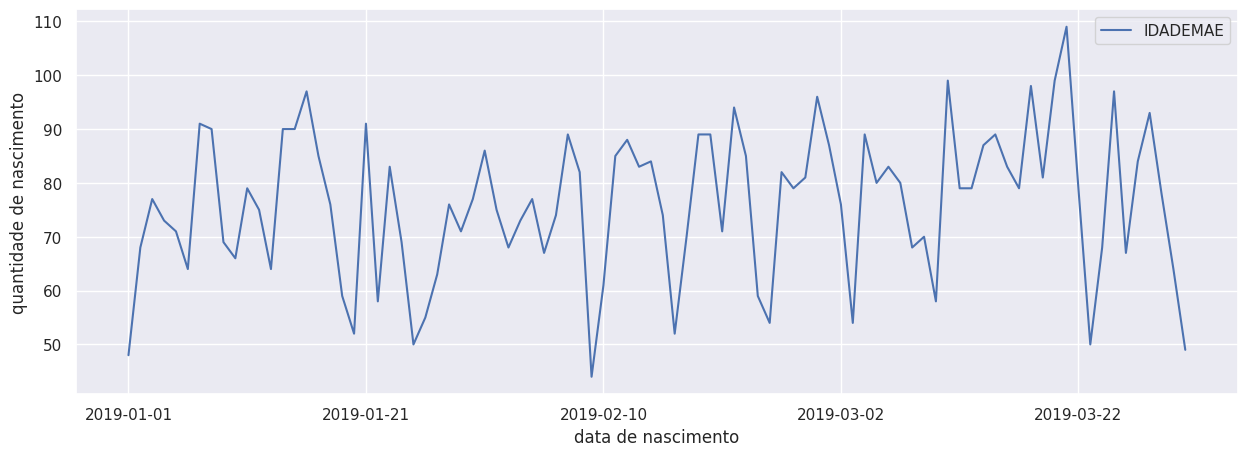

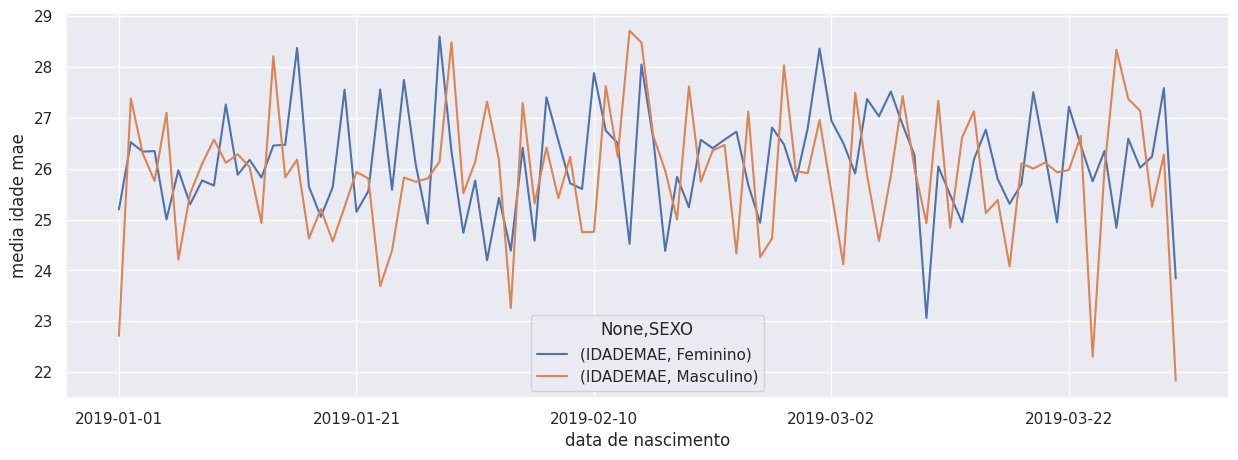

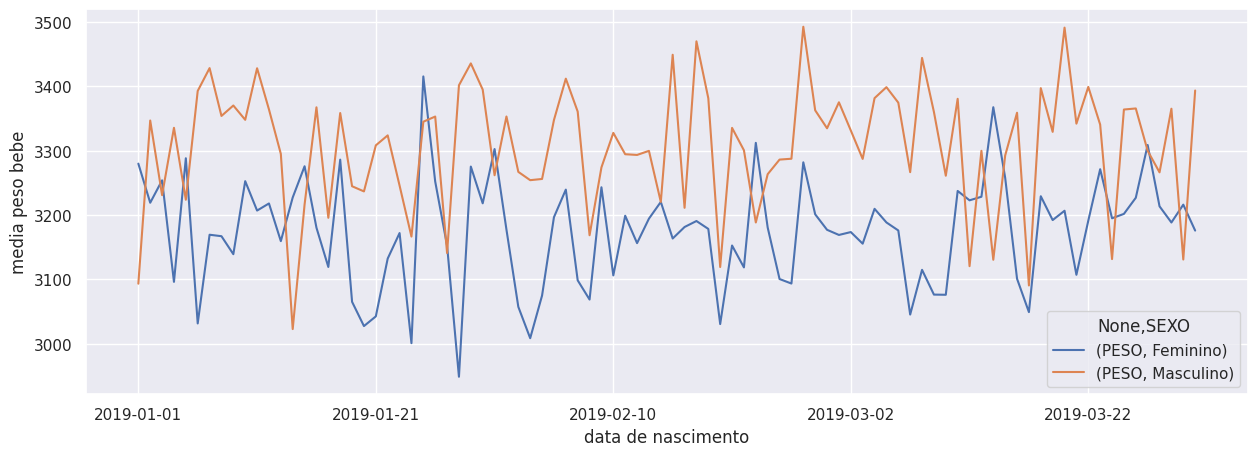

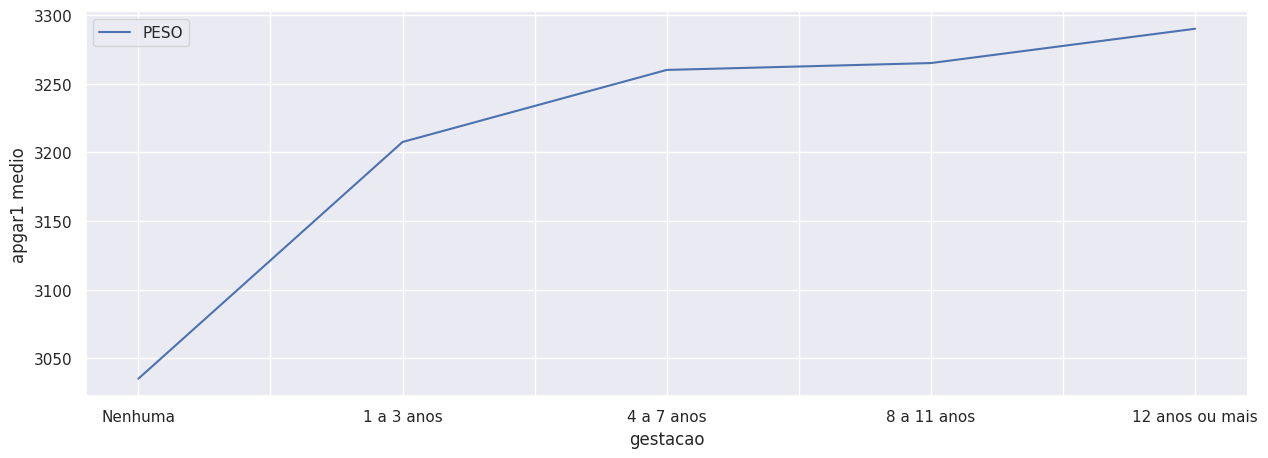

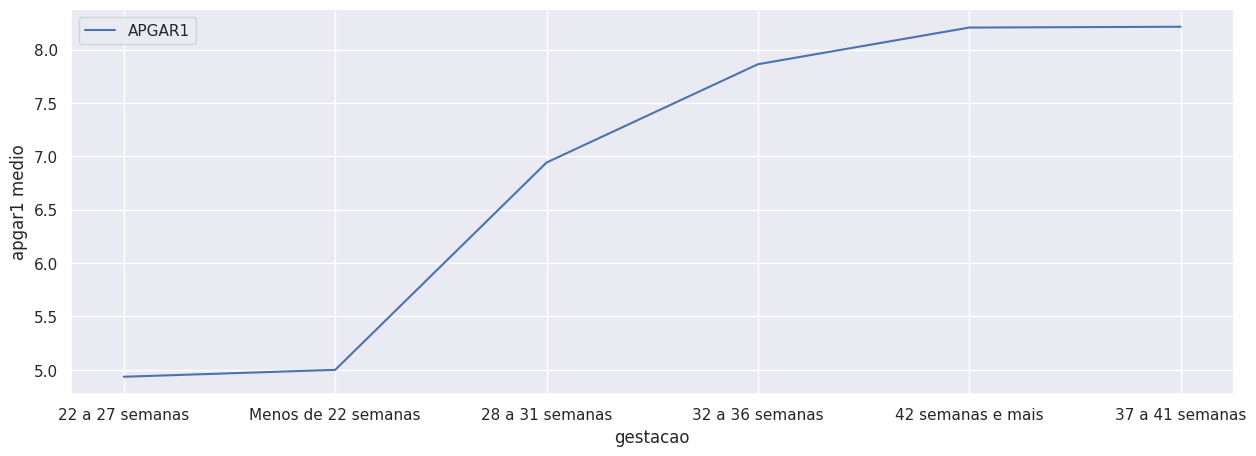

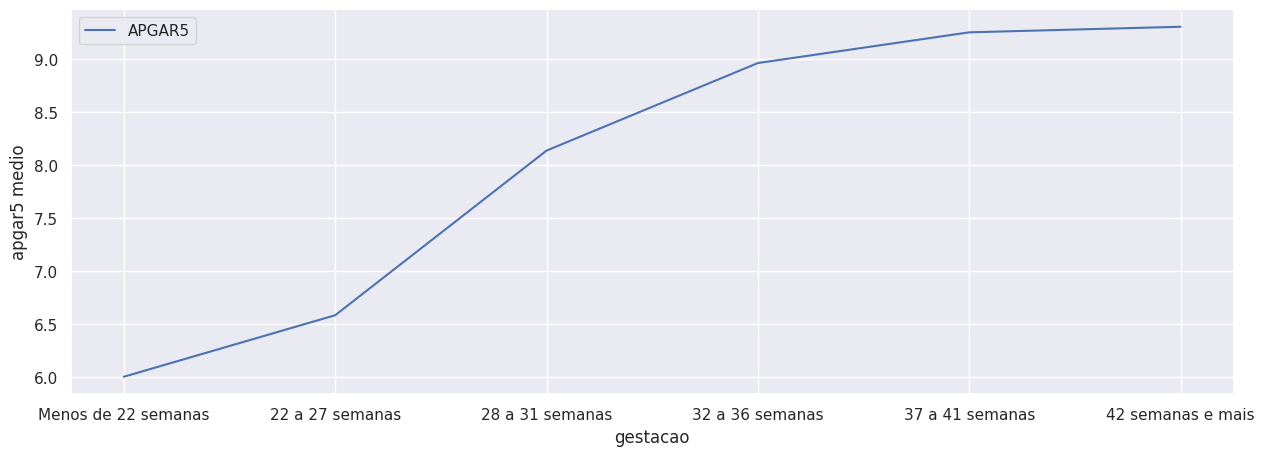

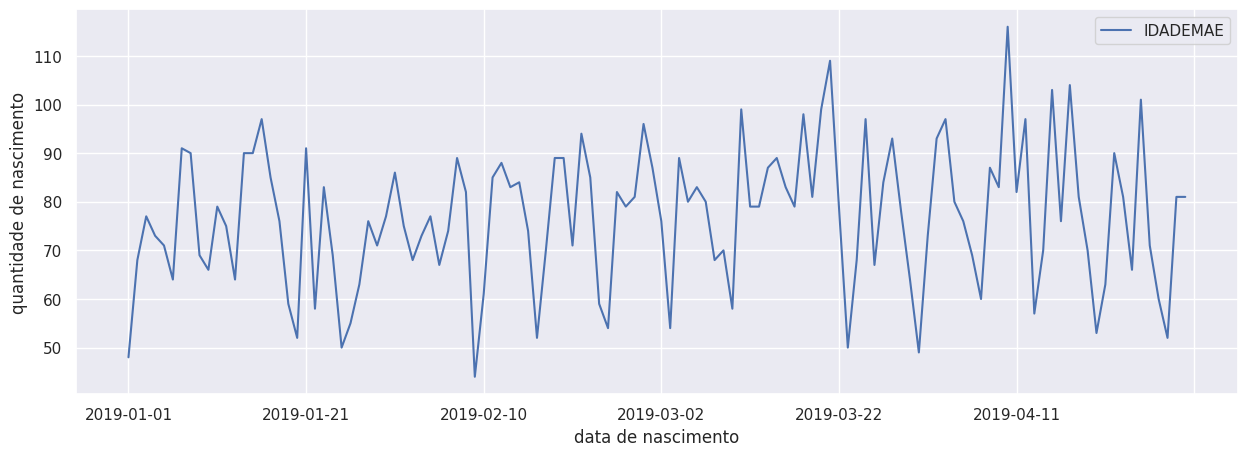

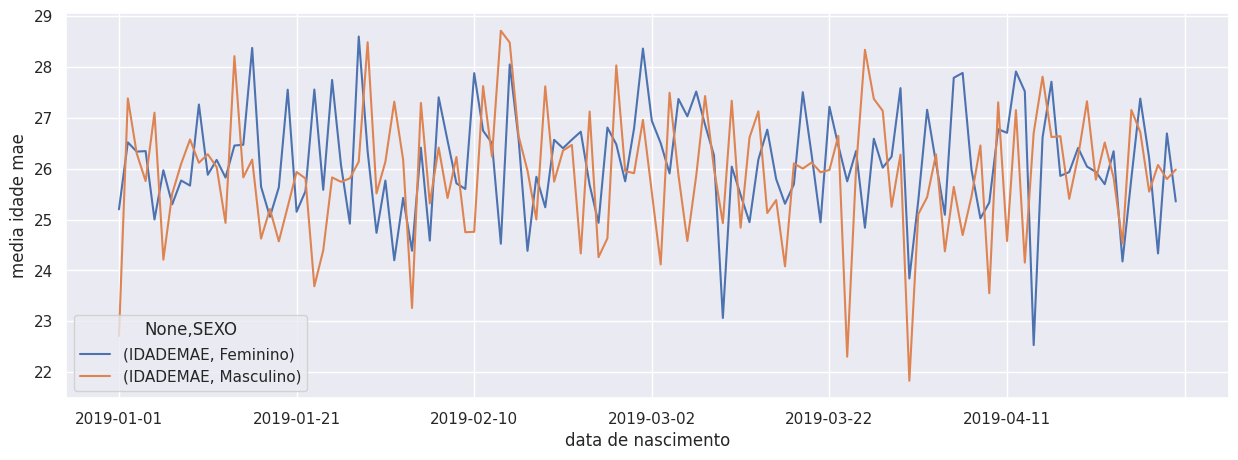

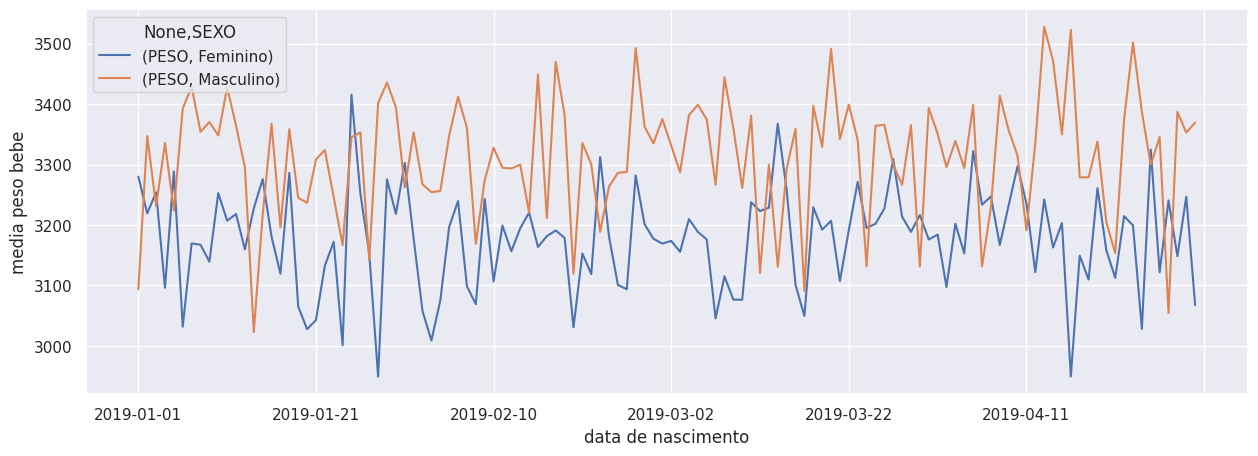

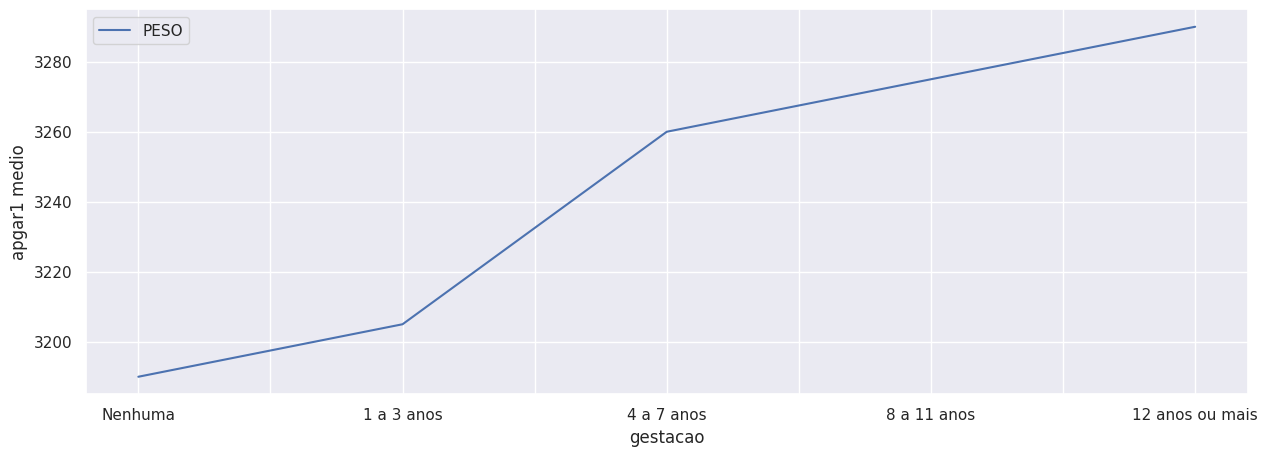

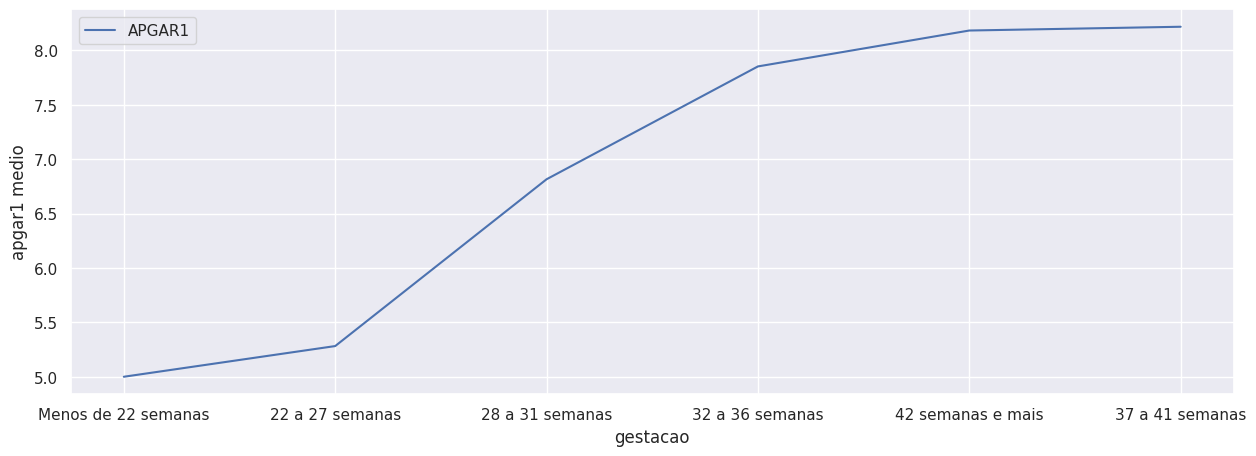

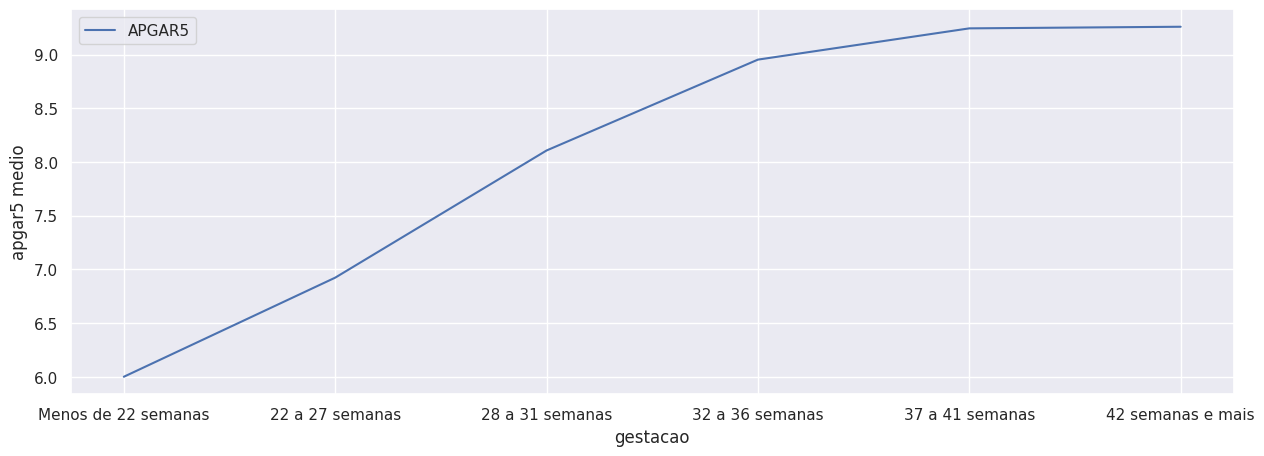

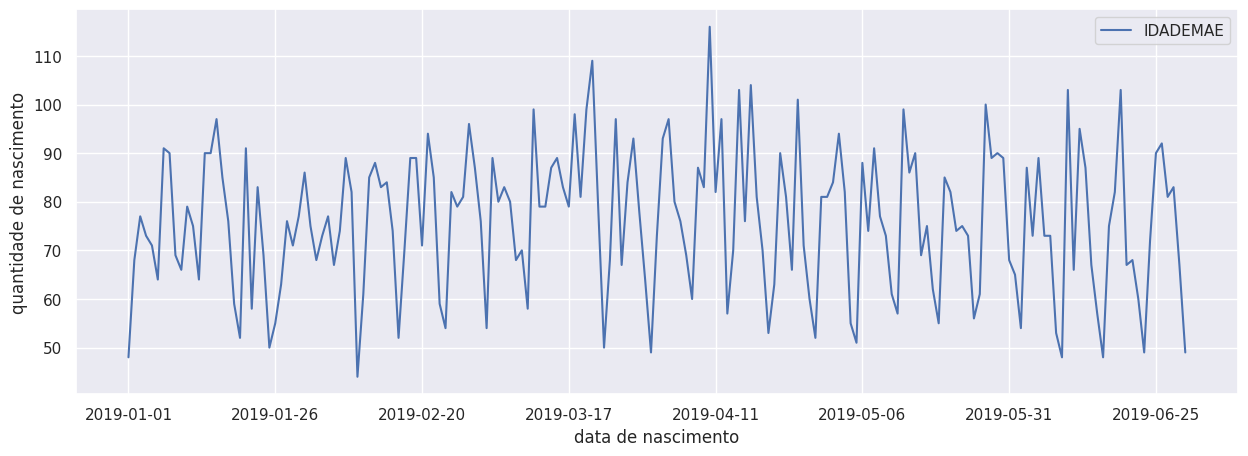

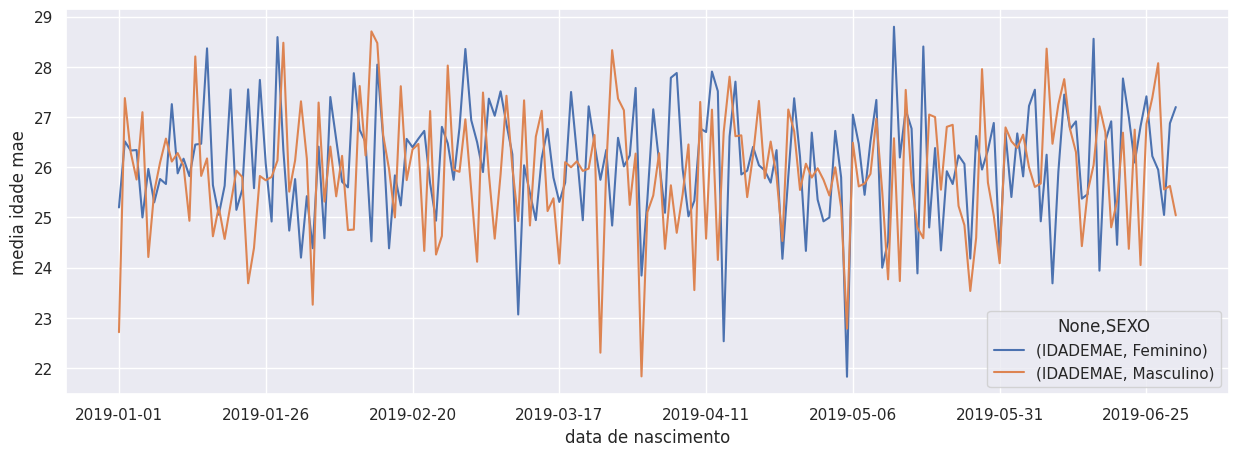

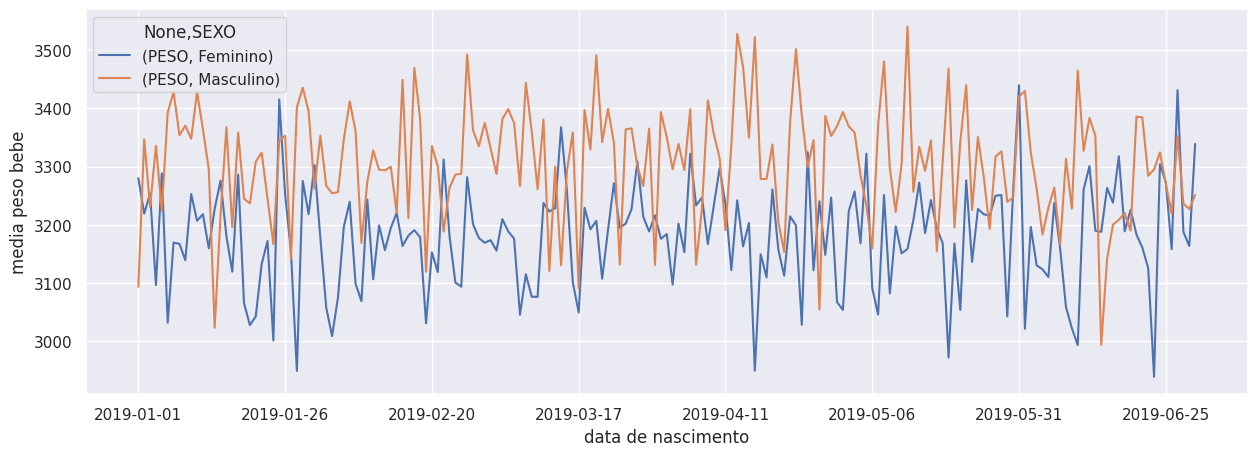

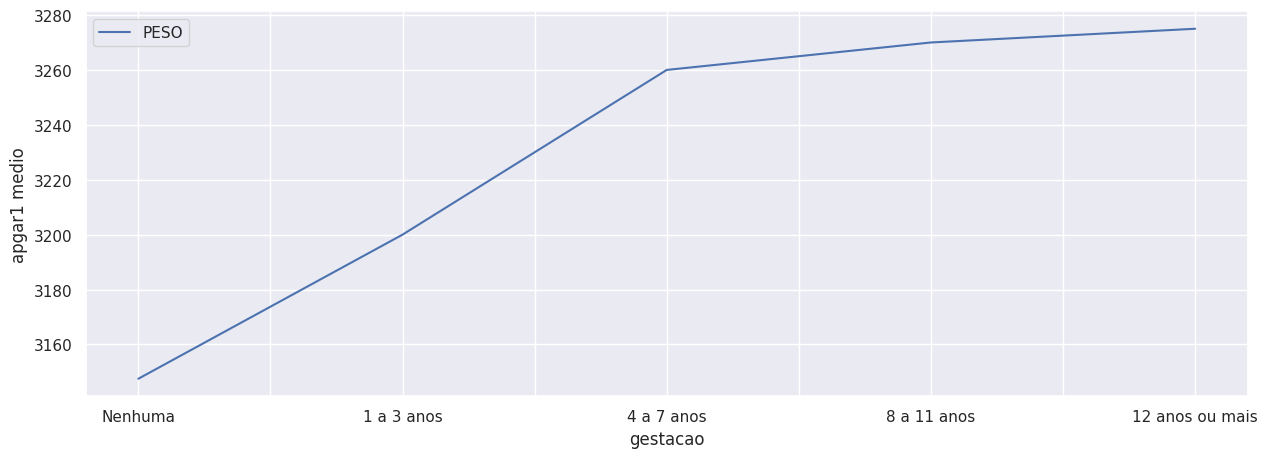

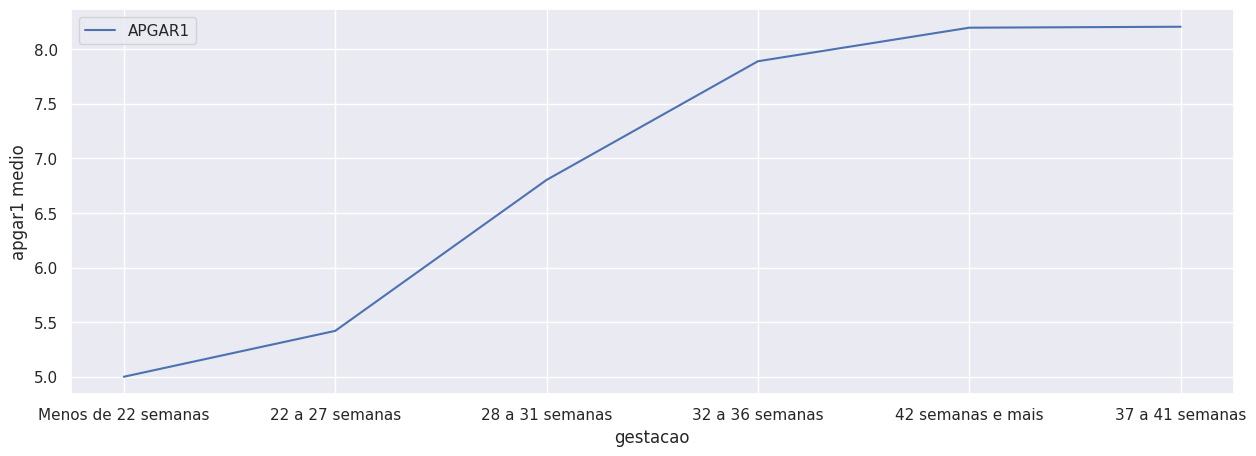

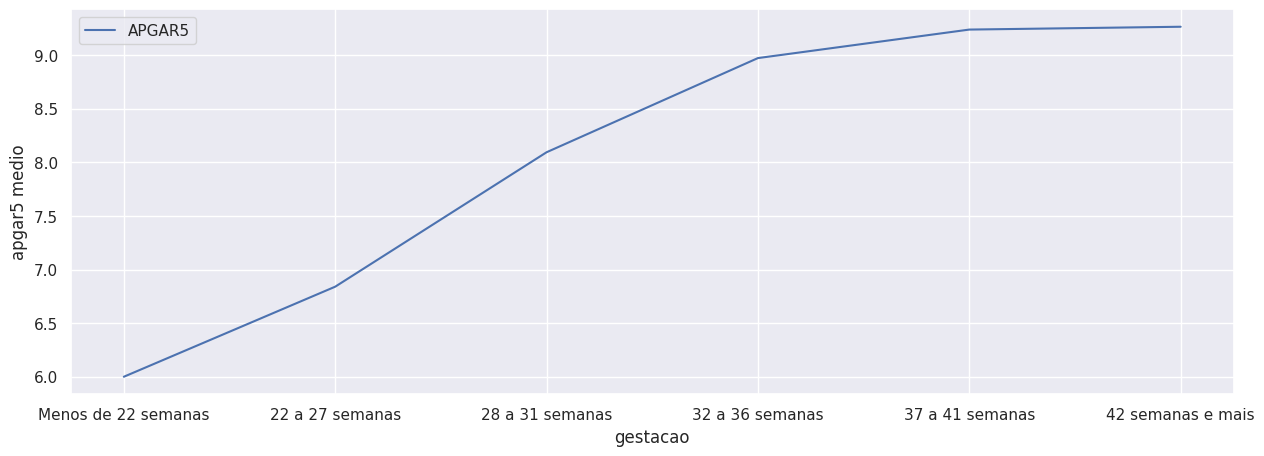

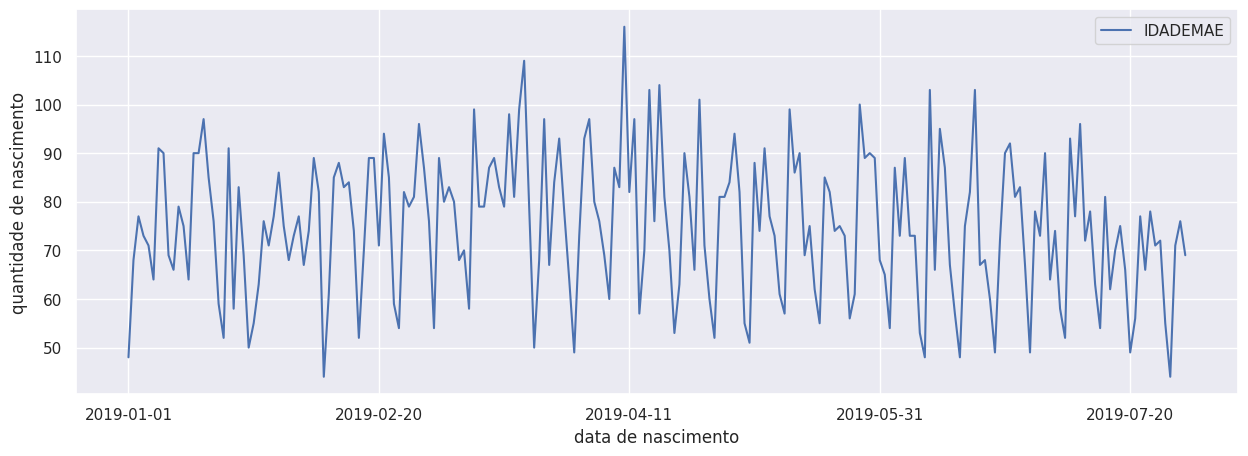

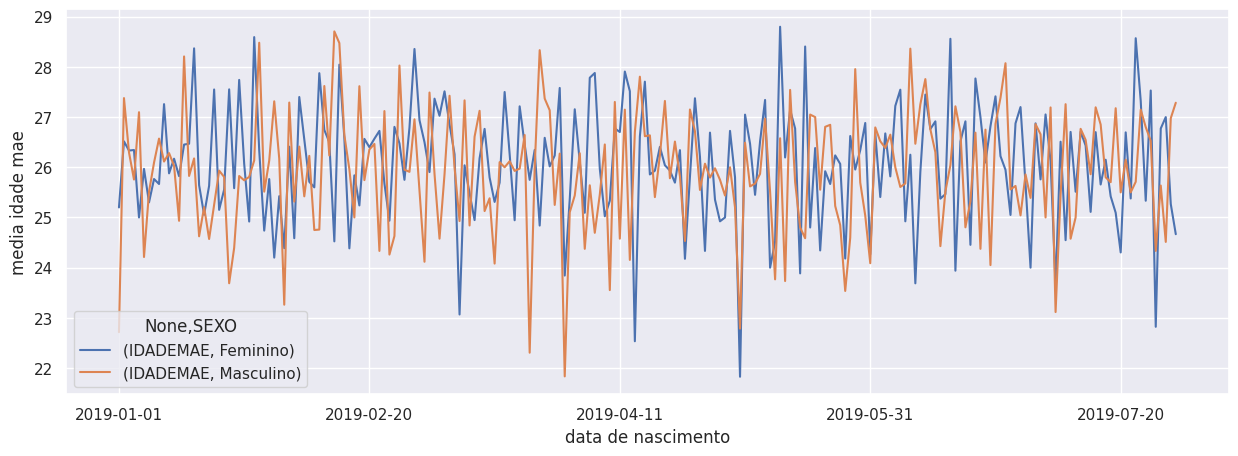

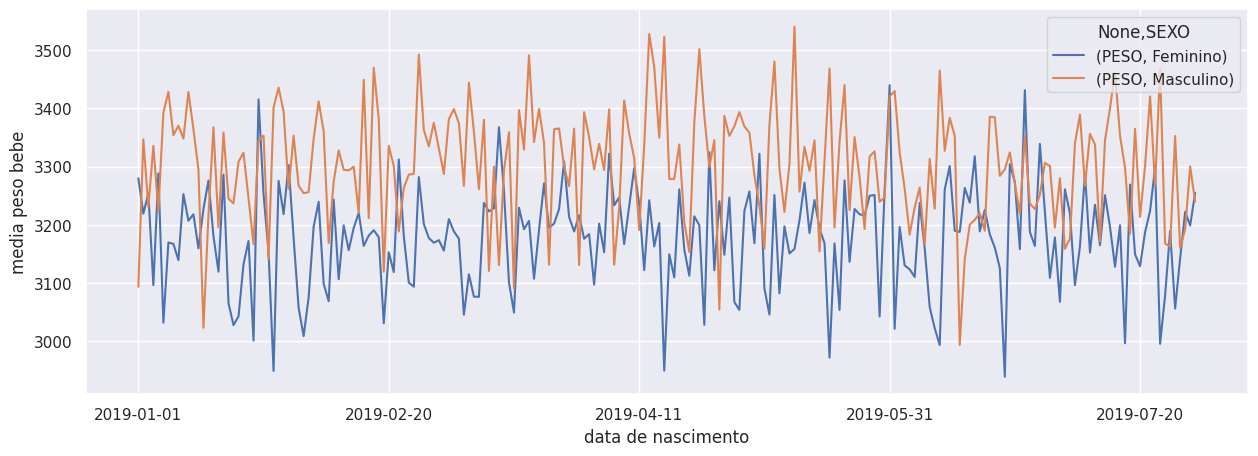

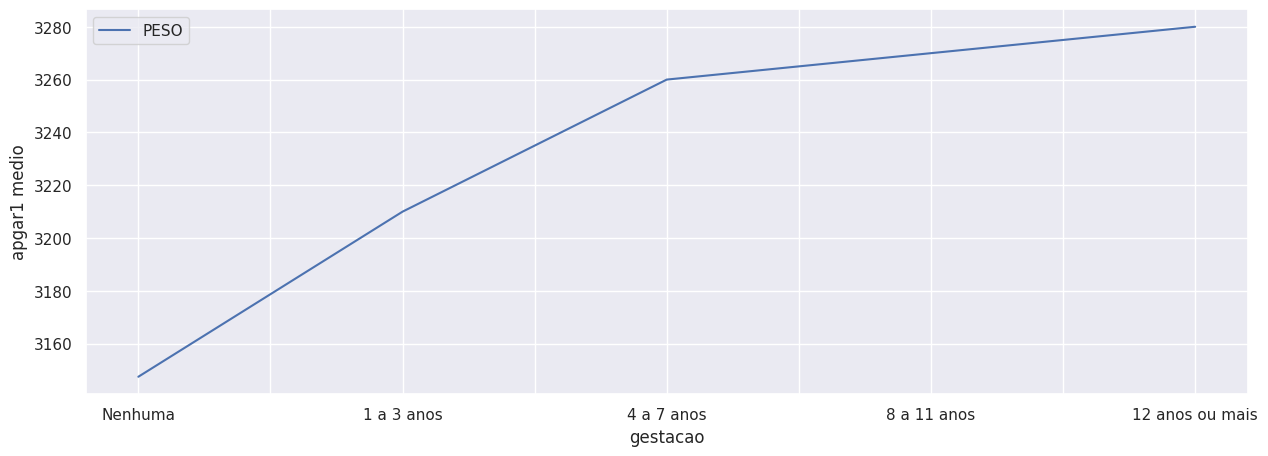

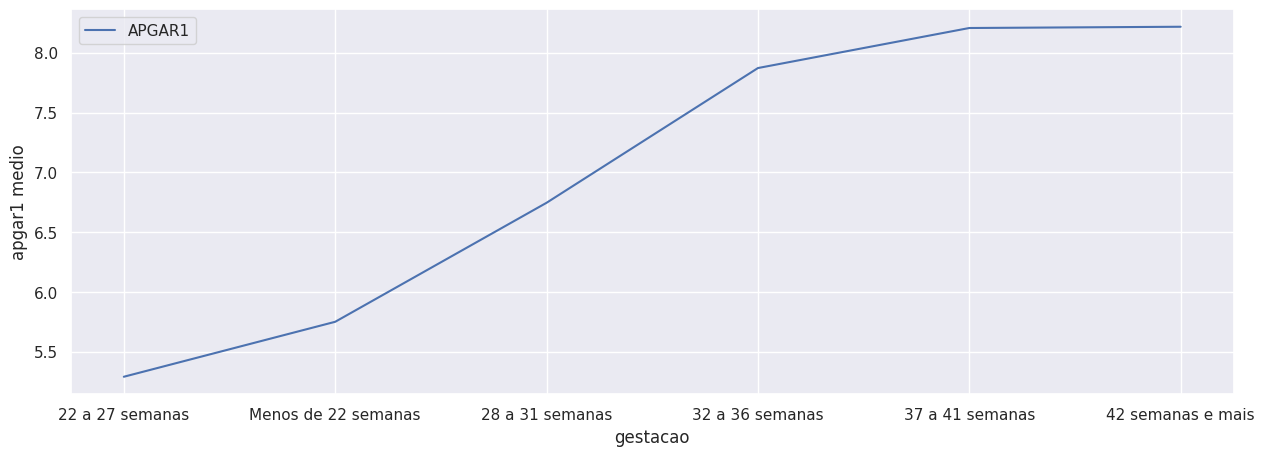

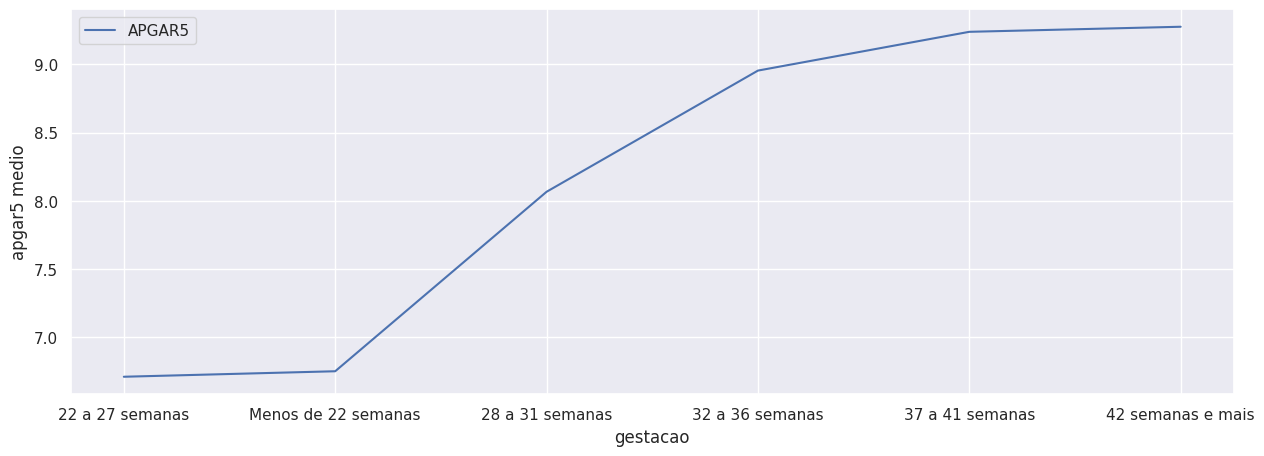

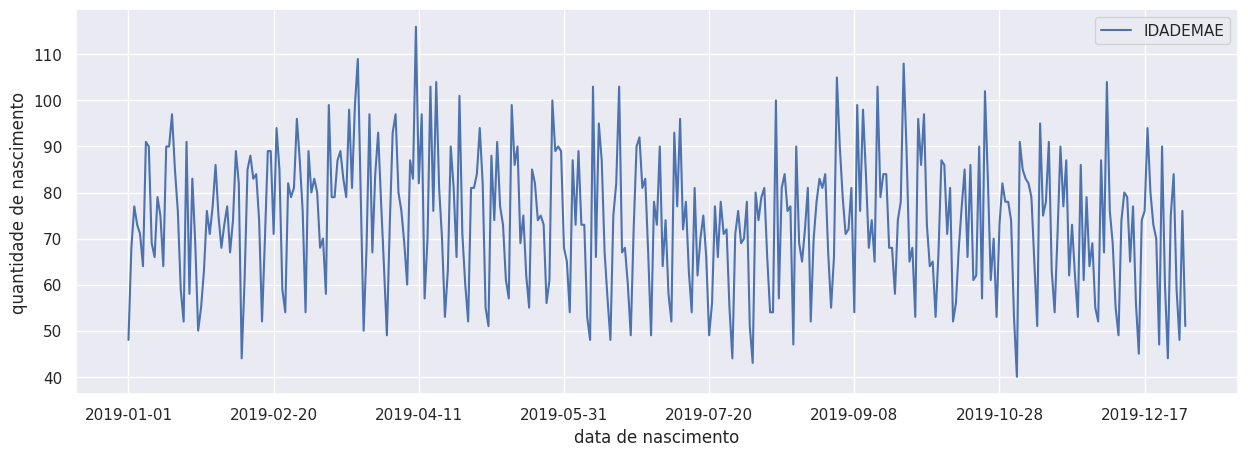

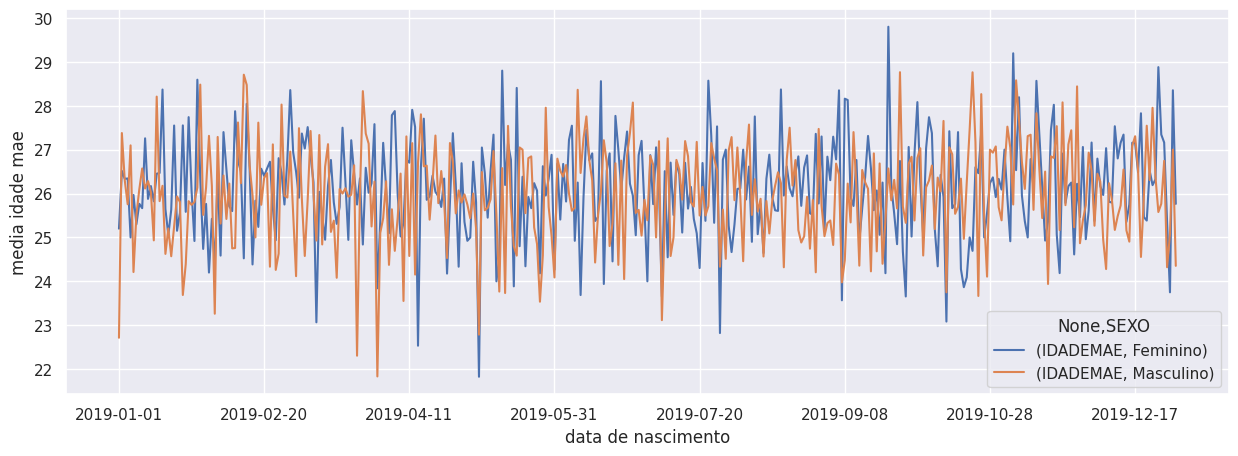

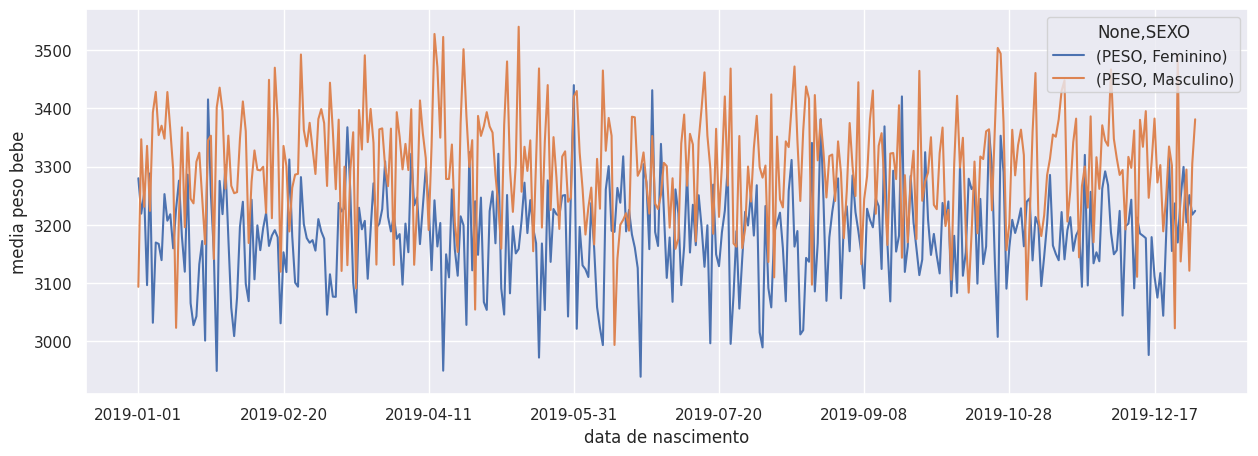

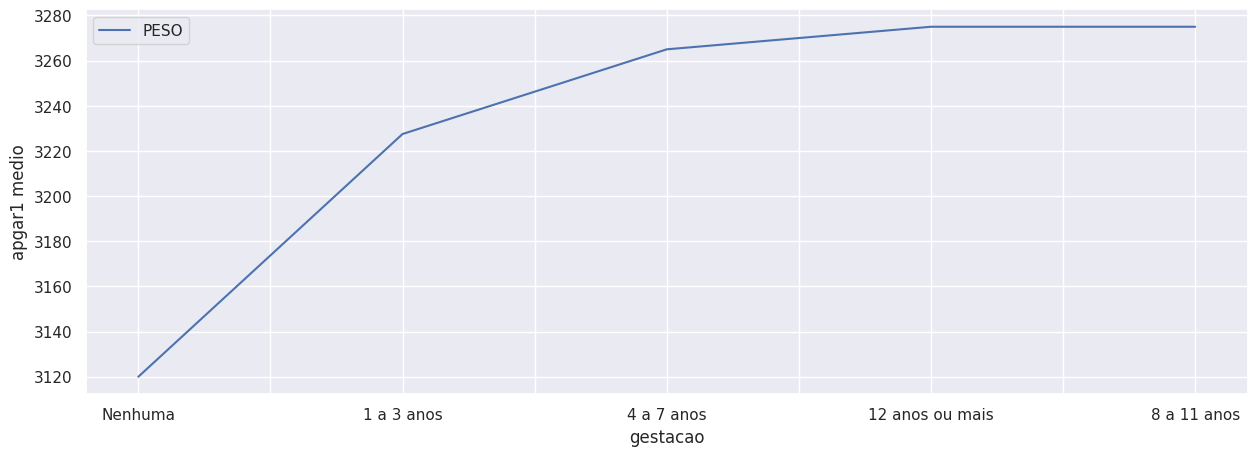

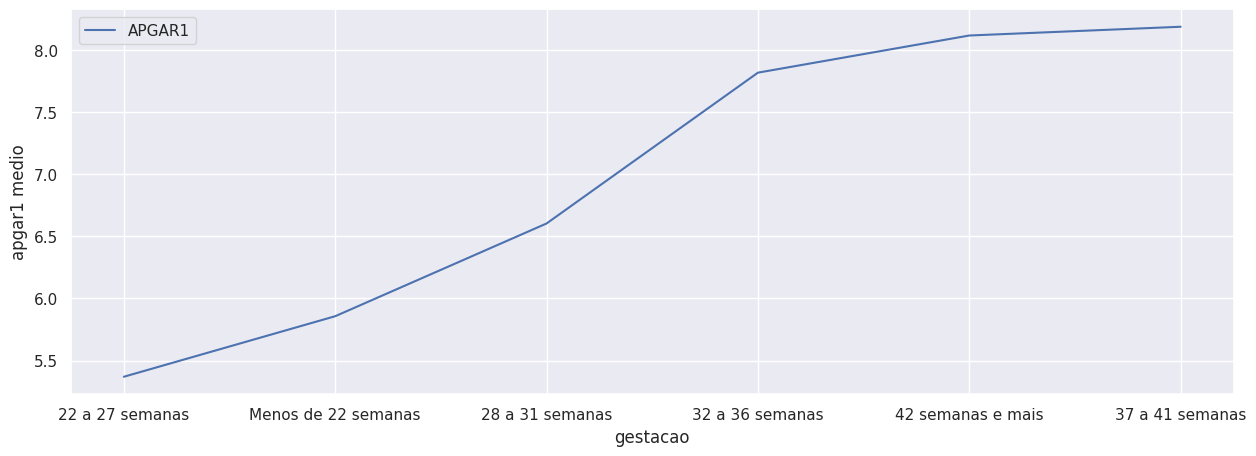

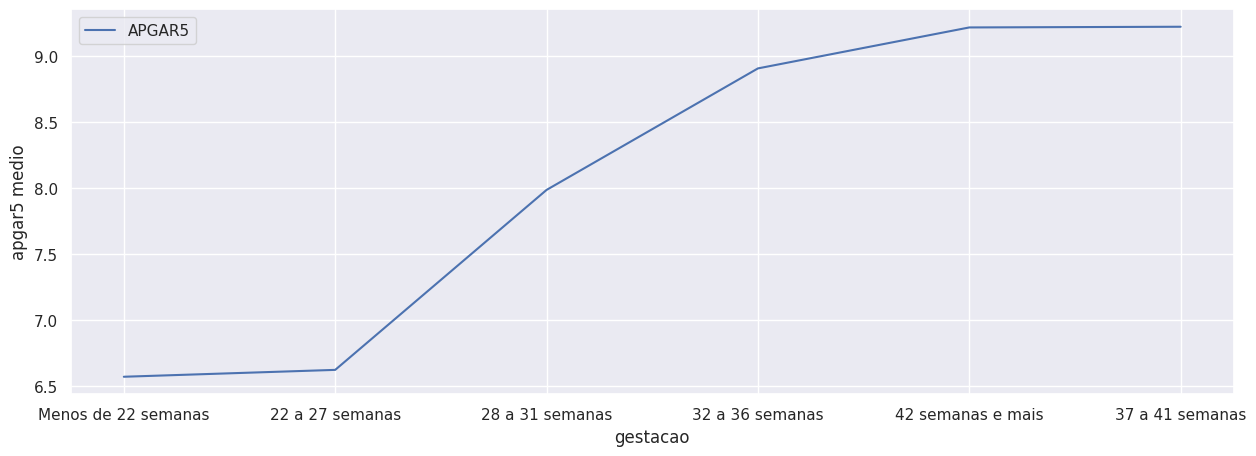

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_theme()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

meses = ['MAR', 'ABR', 'JUN', 'JUL', 'DEZ']

for mes in meses:
    sinasc = pd.read_csv(f'/content/SINASC_RO_2019_{mes}.csv')
    print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)
    os.makedirs('./output/figs/'+max_data, exist_ok=True)


    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
    plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

## 2. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes. <a name="exemplo_5"></a>

 Através de uma linha de comando, podemos selecionar o intervalo desejado e configurá-lo para gerar gráficos para o mês específico solicitado ou para o período completo, desde o início do ano até o mês atual.